Description: This is a notebook that describes the methodology of how mesh refinement study was conducted.

Author: Maxim

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Example:
filename = 'Case1_B/test_ats.demo/observations.dat'
df_observation = pd.read_csv(filename,skiprows=88,sep=' ')
df_observation

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,0.224330,0.224330,0.224330,0.159523,0.159523,0.159523,0.159523
1,86400.0,261.926740,265.768178,268.402010,269.347566,270.019587,270.133541,270.147335,0.224326,0.224326,0.224328,0.159516,0.159522,0.159523,0.159523
2,172800.0,261.355922,264.581452,267.362942,268.539508,269.704270,270.046731,270.121952,0.224325,0.224326,0.224327,0.159511,0.159519,0.159522,0.159523
3,259200.0,261.794704,264.370964,266.861384,268.010090,269.381589,269.916568,270.072084,0.224325,0.224326,0.224327,0.159508,0.159516,0.159521,0.159523
4,345600.0,261.915527,264.257574,266.549982,267.643647,269.091076,269.764063,270.000929,0.224326,0.224326,0.224327,0.159507,0.159514,0.159519,0.159522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,31190400.0,261.267970,262.883730,264.493637,265.358248,266.809769,267.942023,268.769042,0.224325,0.224326,0.224326,0.159501,0.159504,0.159508,0.159512
362,31276800.0,258.113225,261.274041,263.813803,265.007641,266.692591,267.858760,268.688506,0.224325,0.224325,0.224326,0.159500,0.159504,0.159508,0.159511
363,31363200.0,256.877161,260.230271,263.164865,264.570560,266.508551,267.754398,268.602913,0.224325,0.224325,0.224326,0.159500,0.159503,0.159507,0.159511
364,31449600.0,257.798502,260.382420,262.991007,264.332140,266.324236,267.634696,268.510153,0.224325,0.224325,0.224326,0.159499,0.159503,0.159507,0.159510


Text(0, 0.5, 'Temperature (K)')

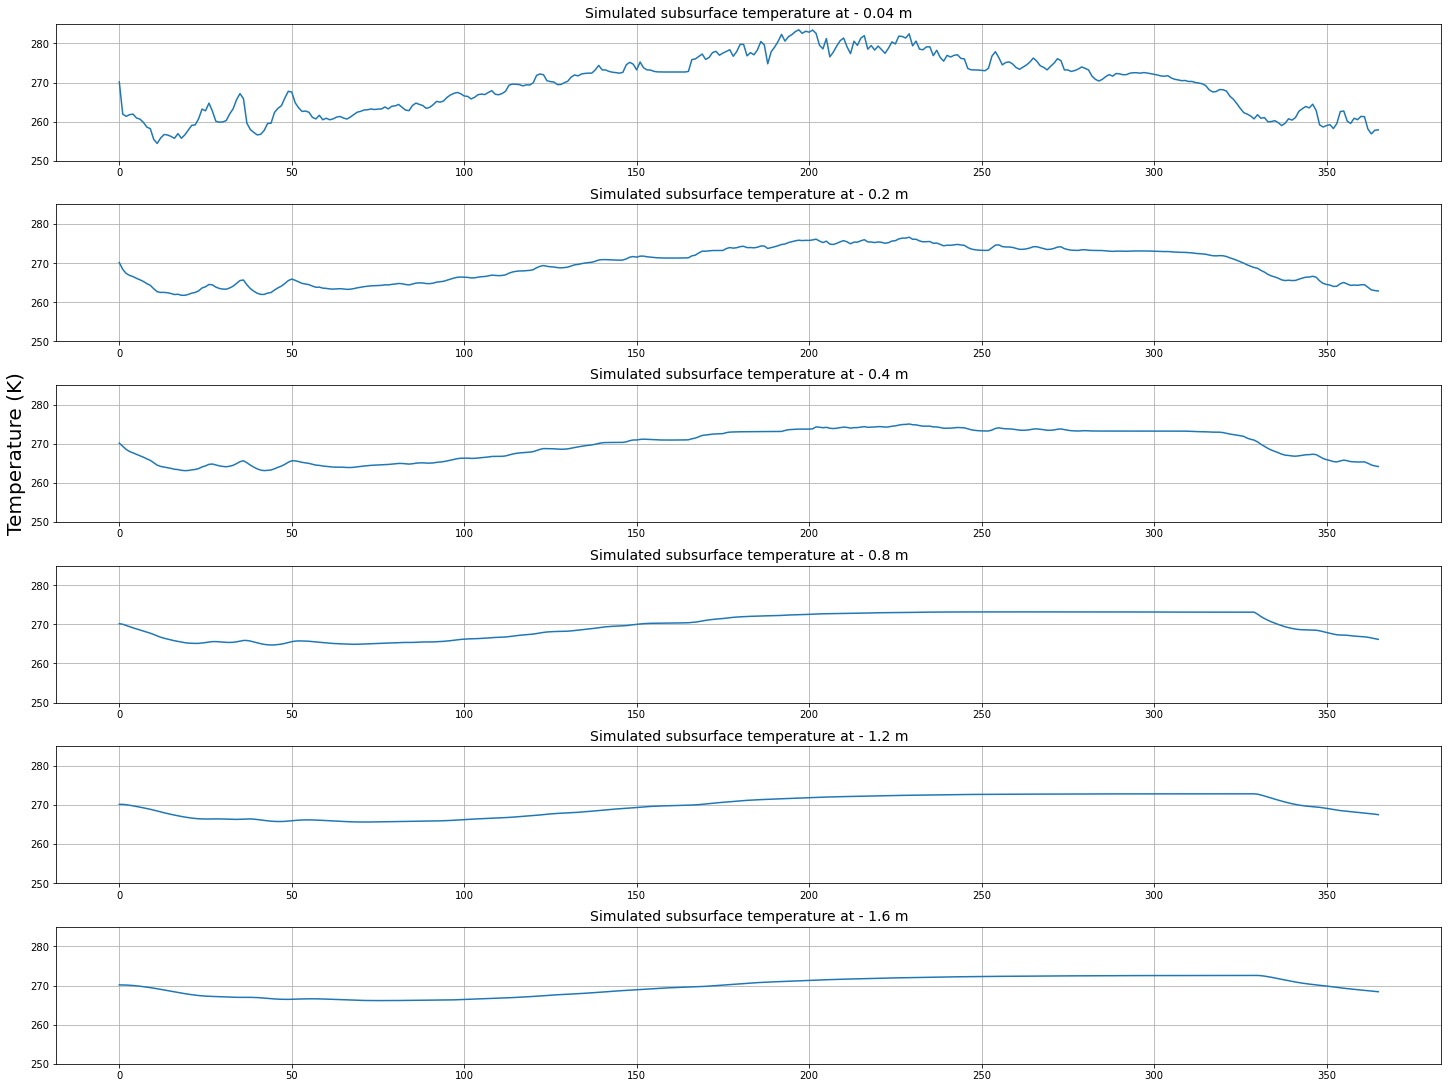

In [12]:
### Plotting the temperature 
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')

#P_por_values = [0.3, 0.5, 0.9]

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    #for i, values in enumerate(P_por_values):
        locals()['f2_ax'+str(j+1)].plot(df_observation[f'point -{depth} temperature [K]'])
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        #locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

In [ ]:
# Moisture?

In [ ]:
def ats_run(file_name):
    """
    Function that calls & reproduces the command line options for executing ats. It involves mainly the following steps:
    1. Creating a demo directory : mkdir output_file_name.demo
    2. 'cd' into the demo directory : cd out_file_name.demo
    3. Excecuting the ats command : ats --xml_file=../input_file_name.xml &>out.log
    
    Note: To execute the command - Please be in the directory where the input xml file is present.
    
    Parameters:
    
    -----
    INPUT
    
    file_name : string
    
    The input xml file name and the directory name (both are the same). Ex: infiltration
    
    
    -----
    OUTPUT:
    
    Runs the ats command and dumps all the outputs in file_name_i.demo
    
    """
    # Removing the directory if it exists
    if os.path.isdir(f'{file_name}.demo/'):
        shutil.rmtree(f'{file_name}.demo/')
    
    # Making a new directory
    os.mkdir(f'{file_name}.demo')
    
    # Changing the directory to the demo directory
    os.chdir(f'{file_name}.demo/')
    
    # Running the ats command
    ats_command = f"ats --xml_file=../{file_name}.xml >out.log"
    
    os.system(ats_command)
    #output = os.popen(ats_command).read()
    
    #return output

In [ ]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly